<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
import catboost as cb
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import cross_val_score, GridSearchCV , train_test_split, TimeSeriesSplit 

from sklearn.metrics import make_scorer, mean_squared_error 

In [2]:
data = pd.read_csv('/datasets/taxi.csv',index_col=[0], parse_dates=[0]) 

Проверим, в хронологичном ли порядке расположены даты и изучим информацию о данных.

In [3]:
display(data.index.is_monotonic)
display(data.head(10))
data.info()

True

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Сделаем ресемплирование с сумой заказов на каждый час по часам и изучим график.

Text(0.5, 1.0, 'Сумма заказов по часам')

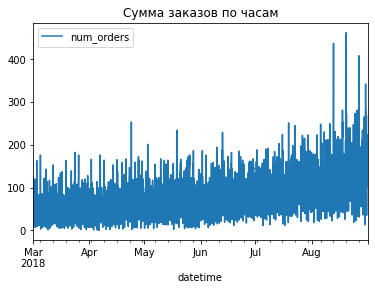

In [4]:
data = data.resample('1H').sum() 
data.plot()
plt.title('Сумма заказов по часам')

### Вывод

Изучили таблицу, таблица имеет два столбца: 
- datetime — дата и время заказа такси 
- num_orders — количество заказов такси

Мы сделали предобработку данных и посмотрели на наши данные с количеством вызовов за каждый час. Данные имеют большую частоту.

## Анализ

Сперва найдем лимиты 

In [5]:
print('Дата начала:', data.index.min())
print('Дата конца:', data.index.max())
print('Всего:', data.index.max() - data.index.min())
data.describe()

Дата начала: 2018-03-01 00:00:00
Дата конца: 2018-08-31 23:00:00
Всего: 183 days 23:00:00


,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


Данные собраны за 183 дня и 23 часа. 

Минимальное количество заказов за 1 час: 0
Максимальное количество заказов за 1 час: 462

Построим график вызовов по дням.

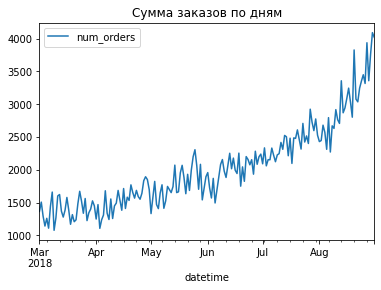

In [6]:
data.resample('1D').sum().plot() 
plt.title('Сумма заказов по дням')
plt.show()

Построим скользящую среднюю.

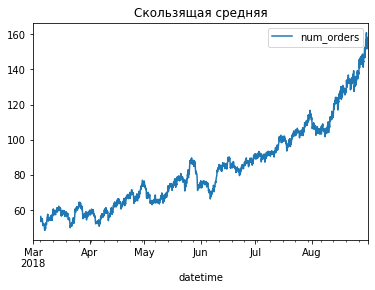

In [7]:
data.rolling(100).mean().plot()
plt.title('Скользящая средняя')
plt.show()

Данные имеют большие колебания, но с помощью средней скользящей мы уже видим восходящий тренд сползающий вверх.

Тренд устойчивый, ускорение, как мы видим на графике, началось с августа 2018 года. 

Теперь проведем анализ временных рядов.

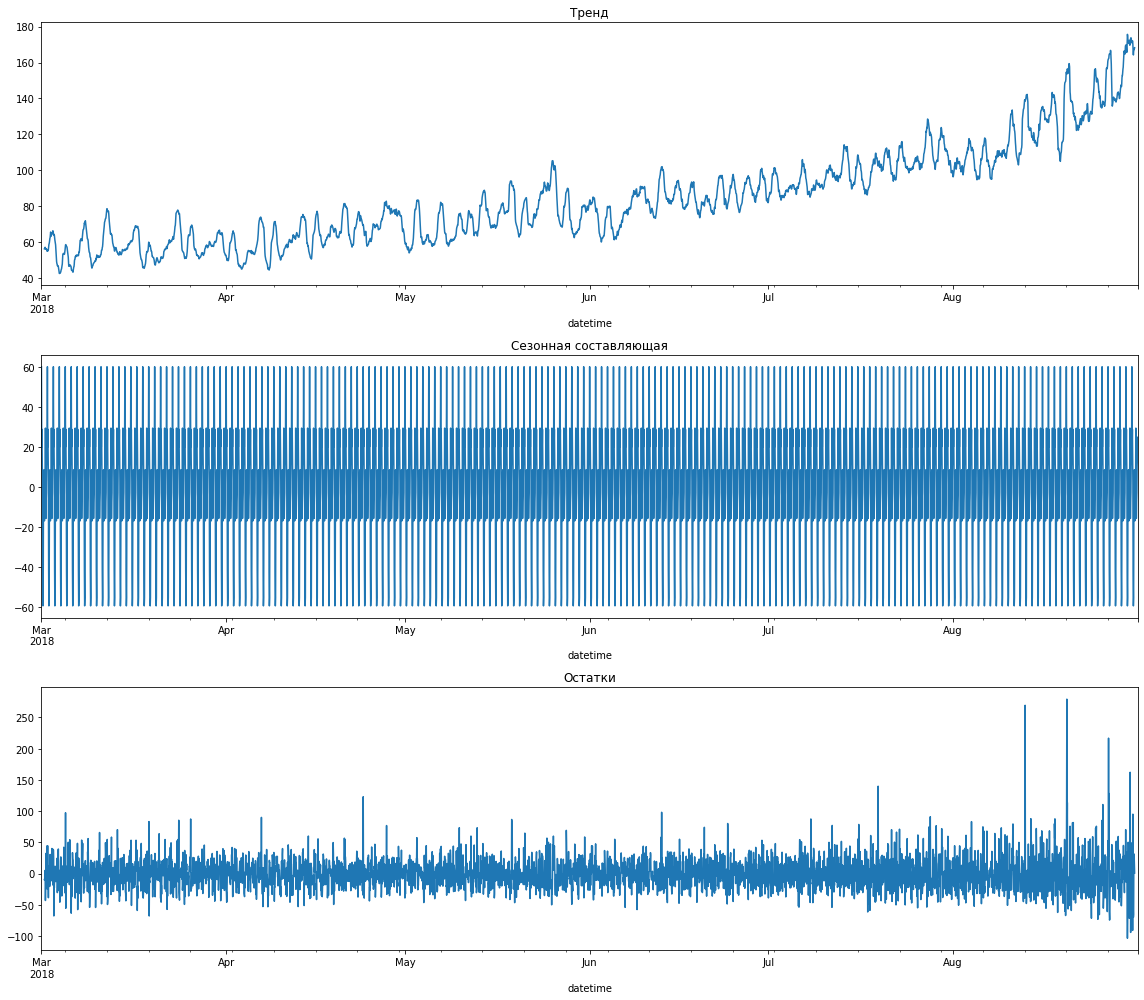

In [8]:
decomposed = seasonal_decompose(data)

plt.figure(figsize=(16, 14))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Сезонная составляющая')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Остатки')
plt.tight_layout()

Графики показывают высокую частотность и суточную сезонность, уменьшим интервал и посмотрим за неделю.

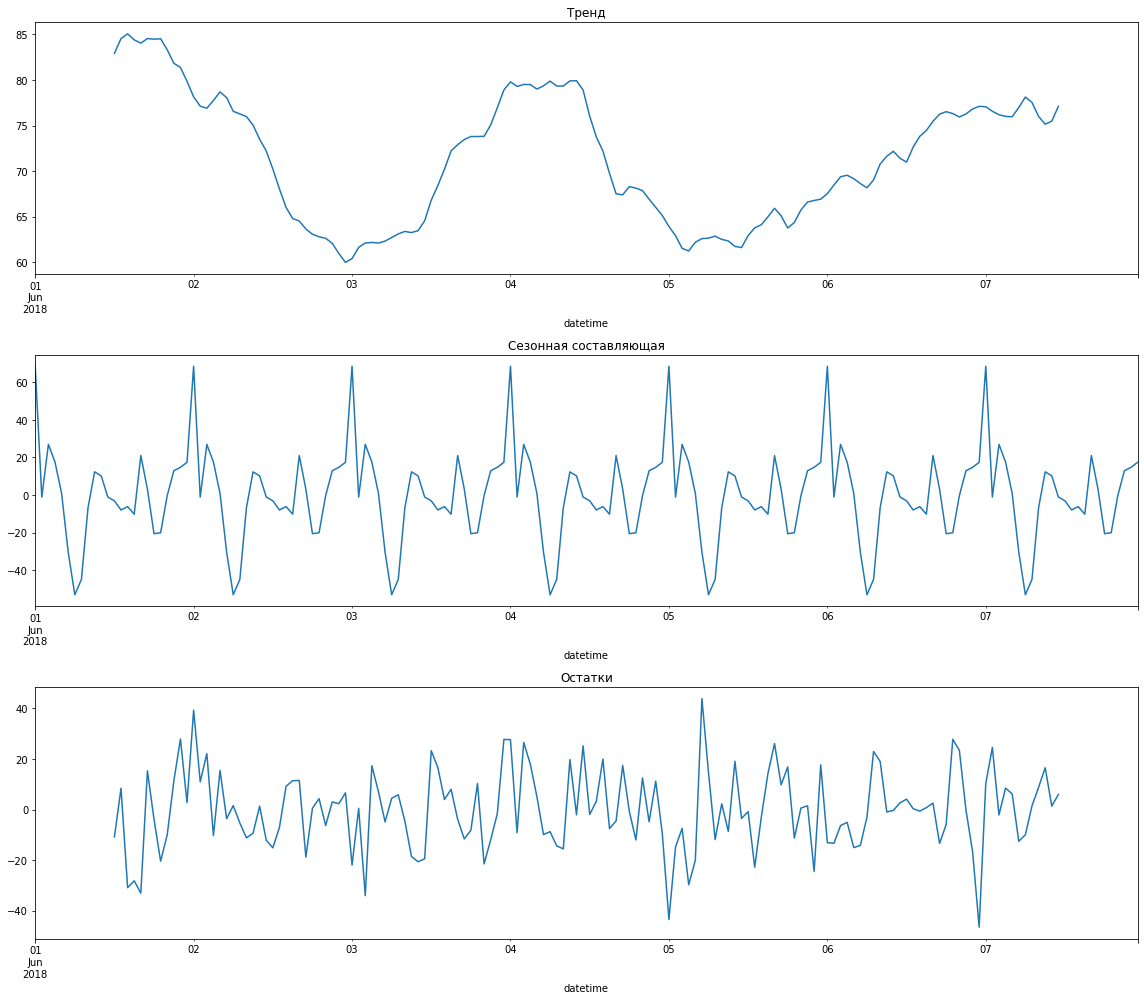

In [9]:
decomposed = seasonal_decompose(data['2018-06-01':'2018-06-07'])

plt.figure(figsize=(16, 14))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Сезонная составляющая')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Остатки')
plt.tight_layout()

Теперь явно видна суточная сезонность. Ночью количество заказов стремится к нулю, в то время как вечерний час пик - момент самого сильного спроса на услуги такси.

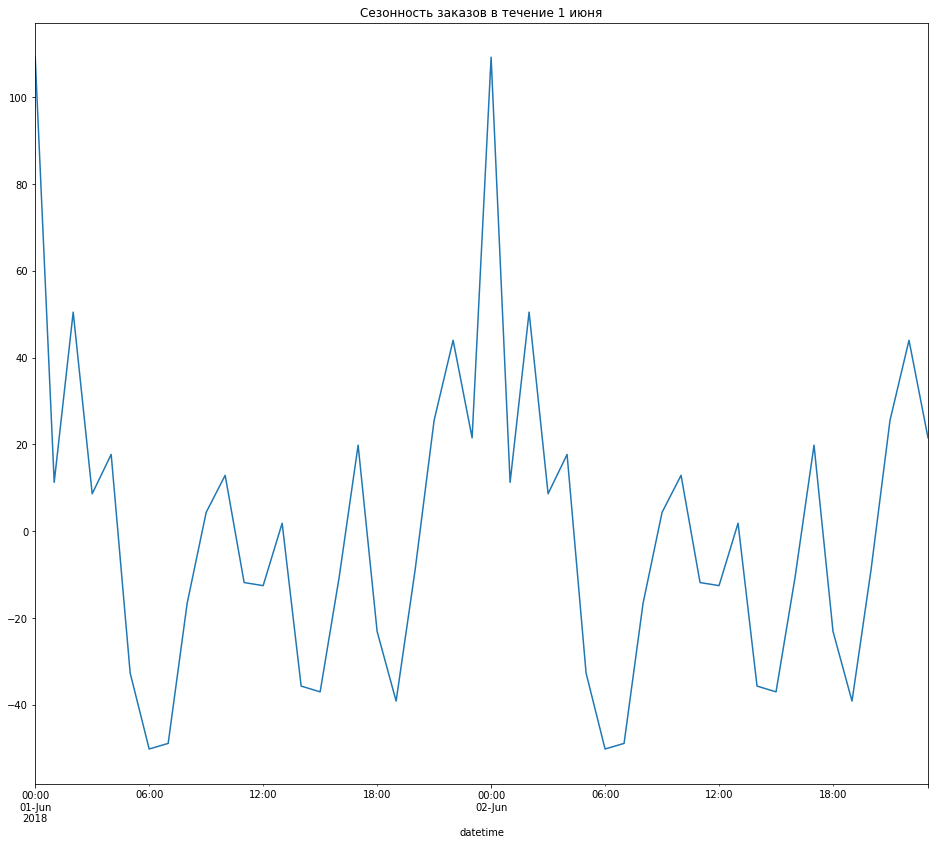

In [10]:
decomposed = seasonal_decompose(data['2018-06-01':'2018-06-02'])

plt.figure(figsize=(16, 14))
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Сезонность заказов в течение 1 июня')
plt.show()

Наблюдаем пик заказов полночь и спад заказов в 6 утра.

На данном этапе мы выяснили, что наблюдается тренд в заказах на увеличение в течении года. Сезонность заказов в пике приходящееся на полночь и спада в 6 утра.

По полученным данным явно наличие увеличения заказов в течении года и ближе к полуночи. Уже сейчас мы можем с уверенностью сказать, что заказов увеличивается в 10 утра, 17 вечера и растет с 18 вечера до полуночи.

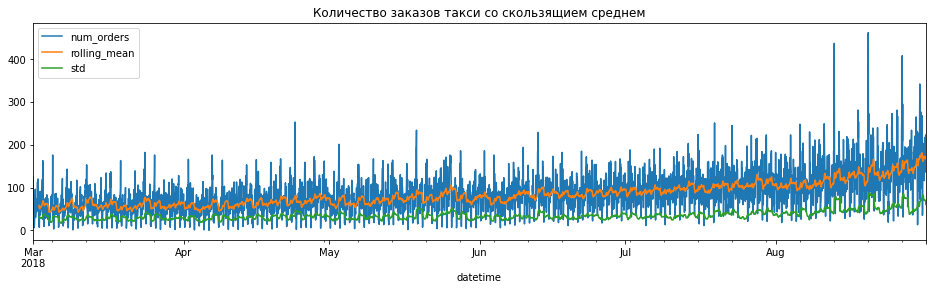

In [11]:
data_plot = data.copy()
data_plot['rolling_mean'] = data_plot.rolling(30).mean()
data_plot['std'] = data_plot['num_orders'].rolling(30).std()
data_plot.plot(figsize=(16, 4))
plt.title("Количество заказов такси со скользящием среднем")
plt.show()

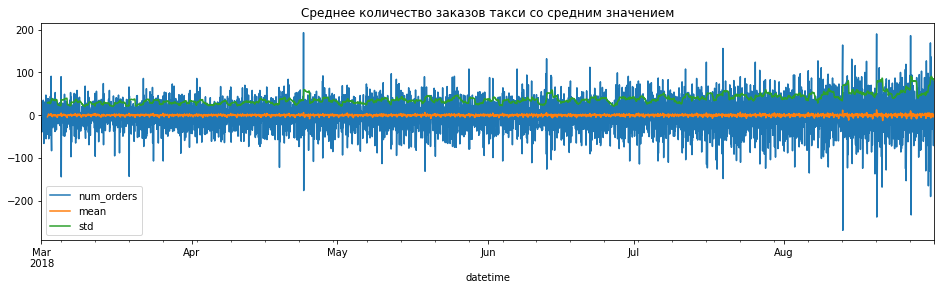

In [12]:
data_shift = data - data.shift()
data_shift['mean'] = data_shift['num_orders'].rolling(30).mean()
data_shift['std'] = data_shift['num_orders'].rolling(30).std()
data_shift.plot(figsize=(16, 4))
plt.title("Среднее количество заказов такси со средним значением")
plt.show()

### Вывод

Провели анализ данных:

- Дисперсия увеличивается;
- Тренд в общем растет, то есть кол-во заказов и пользователей растет;
- Видно, что в раннее утро кол-во заказов резко падает;
- Временной ряд является стационарным.

In [13]:
from statsmodels.tsa.stattools import adfuller

ts = data['num_orders']
st_test = adfuller(ts, regression='ctt')

print('Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный')
if st_test[1] < 0.05:
    print('Наш ряд стационарный')
else:
    print('Ряд нестационарный')

Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный
Наш ряд стационарный


## Обучение

Обучим три модели, ориентируясь на метрику RMSE. 

В качестве моделей используем Линейную регрессию, Случайный лес и CatBoostRegressor.

Создадим функцию для создания признаков.

In [14]:
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    data = data.dropna()

Применим функцию с лагом до 24 часов и 100-м скользящим средним.

In [15]:
make_features(data, 24, 100)

Удалим пропуски и изучим данные.

In [16]:
data = data.dropna()

In [17]:
data.head()

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-05 04:00:00,34,0,4,51.0,32.0,176.0,86.0,68.0,83.0,75.0,...,30.0,41.0,19.0,39.0,39.0,12.0,11.0,22.0,27.0,56.46
2018-03-05 05:00:00,16,0,5,34.0,51.0,32.0,176.0,86.0,68.0,83.0,...,30.0,30.0,41.0,19.0,39.0,39.0,12.0,11.0,22.0,55.56
2018-03-05 06:00:00,3,0,6,16.0,34.0,51.0,32.0,176.0,86.0,68.0,...,56.0,30.0,30.0,41.0,19.0,39.0,39.0,12.0,11.0,54.87
2018-03-05 07:00:00,14,0,7,3.0,16.0,34.0,51.0,32.0,176.0,86.0,...,58.0,56.0,30.0,30.0,41.0,19.0,39.0,39.0,12.0,54.19
2018-03-05 08:00:00,31,0,8,14.0,3.0,16.0,34.0,51.0,32.0,176.0,...,64.0,58.0,56.0,30.0,30.0,41.0,19.0,39.0,39.0,53.67


In [18]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [19]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(3884, 27)
(432, 27)
(3884,)
(432,)


Создадим функцию для расчета метрики RMSE.

In [20]:
def rmse_score (target, predictions):
    rmse = mean_squared_error(target, predictions)**0.5
    return rmse

Создадим функцию обучения наших моделей, поиска оптимальных гиперпараметров и значения метрики RMSE.

In [21]:
def model_look(model, parameters):

    scorer = make_scorer(rmse_score, greater_is_better=False)
    tscv = TimeSeriesSplit(n_splits=5)
    model_grid = GridSearchCV(model, parameters, cv=tscv, scoring=scorer, verbose=5, n_jobs=-1)
    model_grid.fit(features_train, target_train)
    return model_grid.best_score_, model_grid.best_params_

### Линейная регрессия

In [22]:
%%time

parameters = {'fit_intercept':[True,False], 'normalize':[True, False]}
rmse, best_parameters = model_look(LinearRegression(), parameters)
print('Лучшие параметры модели линейной регрессии:', best_parameters)
print('Дали RMSE модели:', rmse)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............fit_intercept=True, normalize=True; total time=   0.1s
[CV 2/5] END .............fit_intercept=True, normalize=True; total time=   0.2s
[CV 3/5] END .............fit_intercept=True, normalize=True; total time=   0.1s
[CV 4/5] END .............fit_intercept=True, normalize=True; total time=   0.2s
[CV 5/5] END .............fit_intercept=True, normalize=True; total time=   0.2s
[CV 1/5] END ............fit_intercept=True, normalize=False; total time=   0.1s
[CV 2/5] END ............fit_intercept=True, normalize=False; total time=   0.2s
[CV 3/5] END ............fit_intercept=True, normalize=False; total time=   0.2s
[CV 4/5] END ............fit_intercept=True, normalize=False; total time=   0.1s
[CV 5/5] END ............fit_intercept=True, normalize=False; total time=   0.1s
[CV 1/5] END ............fit_intercept=False, normalize=True; total time=   0.1s
[CV 2/5] END ............fit_intercept=False, nor

In [23]:
results = pd.DataFrame ({'model':['LinearRegression'], 'best_parameters_train':[best_parameters], 'RMSE_train':[rmse]})
results

,model,best_parameters_train,RMSE_train
0,LinearRegression,"{'fit_intercept': False, 'normalize': True}",-27.05055


### Дерево решений

In [24]:
%%time

parameters = {'max_depth': range(4, 7, 1), 'min_samples_split': range(26, 29, 1)}
rmse, best_parameters = model_look(DecisionTreeRegressor(random_state=12345), parameters)
print('Лучшие параметры модели дерева решений:', best_parameters)
print('Дали RMSE модели:', rmse)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..............max_depth=4, min_samples_split=26; total time=   0.0s
[CV 2/5] END ..............max_depth=4, min_samples_split=26; total time=   0.0s
[CV 3/5] END ..............max_depth=4, min_samples_split=26; total time=   0.0s
[CV 4/5] END ..............max_depth=4, min_samples_split=26; total time=   0.0s
[CV 5/5] END ..............max_depth=4, min_samples_split=26; total time=   0.0s
[CV 1/5] END ..............max_depth=4, min_samples_split=27; total time=   0.0s
[CV 2/5] END ..............max_depth=4, min_samples_split=27; total time=   0.0s
[CV 3/5] END ..............max_depth=4, min_samples_split=27; total time=   0.0s
[CV 4/5] END ..............max_depth=4, min_samples_split=27; total time=   0.0s
[CV 5/5] END ..............max_depth=4, min_samples_split=27; total time=   0.0s
[CV 1/5] END ..............max_depth=4, min_samples_split=28; total time=   0.0s
[CV 2/5] END ..............max_depth=4, min_sampl

In [25]:
results = results.append({'model':'DecisionTreeRegressor', 'best_parameters_train':best_parameters, 'RMSE_train':rmse}, ignore_index=True)
results

,model,best_parameters_train,RMSE_train
0,LinearRegression,"{'fit_intercept': False, 'normalize': True}",-27.050550
1,DecisionTreeRegressor,"{'max_depth': 5, 'min_samples_split': 26}",-29.684909


### Случайный лес

In [26]:
%%time

parameters = {'n_estimators': range(146, 148, 1), 'max_depth': range(17, 20, 1)}
rmse, best_parameters = model_look(RandomForestRegressor(random_state=12345), \
                                    parameters)
print('Лучшие параметры модели случайного леса:', best_parameters)
print('Дали RMSE модели:', rmse)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .................max_depth=17, n_estimators=146; total time=   1.0s
[CV 2/5] END .................max_depth=17, n_estimators=146; total time=   2.1s
[CV 3/5] END .................max_depth=17, n_estimators=146; total time=   3.1s
[CV 4/5] END .................max_depth=17, n_estimators=146; total time=   4.1s
[CV 5/5] END .................max_depth=17, n_estimators=146; total time=   5.3s
[CV 1/5] END .................max_depth=17, n_estimators=147; total time=   1.0s
[CV 2/5] END .................max_depth=17, n_estimators=147; total time=   2.1s
[CV 3/5] END .................max_depth=17, n_estimators=147; total time=   3.1s
[CV 4/5] END .................max_depth=17, n_estimators=147; total time=   4.1s
[CV 5/5] END .................max_depth=17, n_estimators=147; total time=   5.2s
[CV 1/5] END .................max_depth=18, n_estimators=146; total time=   1.0s
[CV 2/5] END .................max_depth=18, n_est

In [27]:
results = results.append({'model':'RandomForestRegressor', 'best_parameters_train':best_parameters, 'RMSE_train':rmse}, ignore_index=True)
results

,model,best_parameters_train,RMSE_train
0,LinearRegression,"{'fit_intercept': False, 'normalize': True}",-27.050550
1,DecisionTreeRegressor,"{'max_depth': 5, 'min_samples_split': 26}",-29.684909
2,RandomForestRegressor,"{'max_depth': 17, 'n_estimators': 146}",-25.059912


### CatBoostRegressor

In [28]:
%%time

parameters = {'depth': range(2, 5, 1), 'iterations': range(18, 22, 1)}
rmse, best_parameters = model_look (CatBoostRegressor(loss_function="RMSE", \
                                                      learning_rate = 0.5), parameters)
print('Лучшие параметры модели CatBoostRegressor:', best_parameters)
print('Дали RMSE модели:', rmse)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0:	learn: 25.2975403	total: 47.1ms	remaining: 801ms
1:	learn: 22.9531731	total: 47.9ms	remaining: 383ms
2:	learn: 21.2051949	total: 48.9ms	remaining: 244ms
3:	learn: 20.5826020	total: 49.5ms	remaining: 173ms
4:	learn: 20.0637814	total: 50.1ms	remaining: 130ms
5:	learn: 19.7735269	total: 50.6ms	remaining: 101ms
6:	learn: 19.6290938	total: 51.2ms	remaining: 80.5ms
7:	learn: 19.4556732	total: 51.8ms	remaining: 64.8ms
8:	learn: 19.2745977	total: 52.5ms	remaining: 52.5ms
9:	learn: 19.1524612	total: 53ms	remaining: 42.4ms
10:	learn: 18.8877699	total: 53.5ms	remaining: 34ms
11:	learn: 18.6724679	total: 54ms	remaining: 27ms
12:	learn: 18.4565944	total: 54.6ms	remaining: 21ms
13:	learn: 18.3457098	total: 55.1ms	remaining: 15.8ms
14:	learn: 18.2074264	total: 55.7ms	remaining: 11.1ms
15:	learn: 18.0505170	total: 56.4ms	remaining: 7.04ms
16:	learn: 17.9110591	total: 57ms	remaining: 3.35ms
17:	learn: 17.6276219	total: 57.7ms	remaining: 0u

In [29]:
results = results.append({'model':'CatBoostRegressor', 'best_parameters_train':best_parameters, 'RMSE_train':rmse}, ignore_index=True)
results

,model,best_parameters_train,RMSE_train
0,LinearRegression,"{'fit_intercept': False, 'normalize': True}",-27.050550
1,DecisionTreeRegressor,"{'max_depth': 5, 'min_samples_split': 26}",-29.684909
2,RandomForestRegressor,"{'max_depth': 17, 'n_estimators': 146}",-25.059912
3,CatBoostRegressor,"{'depth': 4, 'iterations': 20}",-25.644672


### LGBMRegressor

In [30]:
%%time

parameters = {'n_estimators':range(38, 42, 1)}
rmse, best_parameters = model_look (LGBMRegressor(random_state=12345), parameters)
print('Лучшие параметры модели LGBMRegressor:', best_parameters)
print('Дали RMSE модели:', rmse)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ................................n_estimators=38; total time=   0.3s
[CV 2/5] END ................................n_estimators=38; total time=   0.5s
[CV 3/5] END ................................n_estimators=38; total time=   0.4s
[CV 4/5] END ................................n_estimators=38; total time=   0.4s
[CV 5/5] END ................................n_estimators=38; total time=   0.8s
[CV 1/5] END ................................n_estimators=39; total time=   0.3s
[CV 2/5] END ................................n_estimators=39; total time=   0.4s
[CV 3/5] END ................................n_estimators=39; total time=   0.4s
[CV 4/5] END ................................n_estimators=39; total time=   0.4s
[CV 5/5] END ................................n_estimators=39; total time=   0.6s
[CV 1/5] END ................................n_estimators=40; total time=   0.2s
[CV 2/5] END ................................n_es

In [31]:
results = results.append({'model':'LGBMRegressor', 'best_parameters_train':best_parameters, 'RMSE_train':rmse}, ignore_index=True)
results

,model,best_parameters_train,RMSE_train
0,LinearRegression,"{'fit_intercept': False, 'normalize': True}",-27.050550
1,DecisionTreeRegressor,"{'max_depth': 5, 'min_samples_split': 26}",-29.684909
2,RandomForestRegressor,"{'max_depth': 17, 'n_estimators': 146}",-25.059912
3,CatBoostRegressor,"{'depth': 4, 'iterations': 20}",-25.644672
4,LGBMRegressor,{'n_estimators': 41},-25.029898


### Вывод

В процессе обучения моделей на обучающей выборке лучше всего себя показала модель линейной регрессии. Проверим качество предсказаний наших моделей с наилучшими гиперпараметрами на тестовой выборке.

Я дополнительно две модели обучил, чтобы сравнить все модели.

## Тестирование

In [32]:
def ml_result(model):
    
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    
    rmse = mean_squared_error(target_test, predictions)**0.5

    plt.figure(figsize=(15,5))
    plt.title('Сравнение реальных значений и предсказанных')

    plt.plot(target_test.index, predictions, 'r', label='Предсказания')
    plt.plot(target_test.index, target_test.values, 'g', label='Реальные значения')
    plt.legend(loc="upper left")
    plt.grid(True)
    
    return rmse

### Линейная регрессия

CPU times: user 73.3 ms, sys: 88.9 ms, total: 162 ms
Wall time: 168 ms


,model,best_parameters_train,RMSE_train,rmse_test
0,LinearRegression,"{'fit_intercept': False, 'normalize': True}",-27.050550,45.174417
1,DecisionTreeRegressor,"{'max_depth': 5, 'min_samples_split': 26}",-29.684909,NaN
2,RandomForestRegressor,"{'max_depth': 17, 'n_estimators': 146}",-25.059912,NaN
3,CatBoostRegressor,"{'depth': 4, 'iterations': 20}",-25.644672,NaN
4,LGBMRegressor,{'n_estimators': 41},-25.029898,NaN


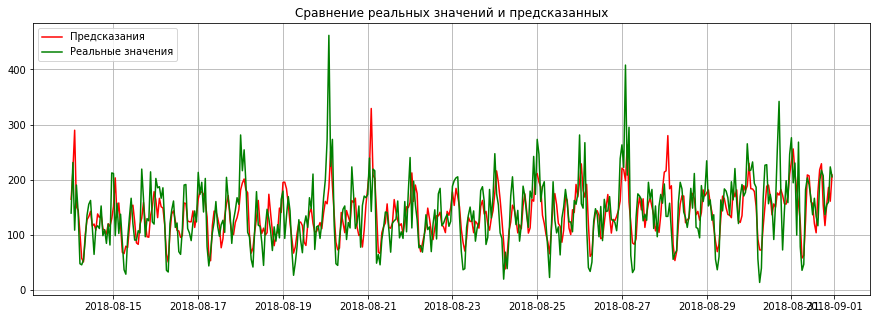

In [33]:
%%time

rmse = ml_result(LinearRegression(fit_intercept=True, normalize=False))
results.loc[0, 'rmse_test'] = rmse
results

### Дерево решений

CPU times: user 39.6 ms, sys: 7.89 ms, total: 47.5 ms
Wall time: 54.1 ms


,model,best_parameters_train,RMSE_train,rmse_test
0,LinearRegression,"{'fit_intercept': False, 'normalize': True}",-27.050550,45.174417
1,DecisionTreeRegressor,"{'max_depth': 5, 'min_samples_split': 26}",-29.684909,55.900218
2,RandomForestRegressor,"{'max_depth': 17, 'n_estimators': 146}",-25.059912,NaN
3,CatBoostRegressor,"{'depth': 4, 'iterations': 20}",-25.644672,NaN
4,LGBMRegressor,{'n_estimators': 41},-25.029898,NaN


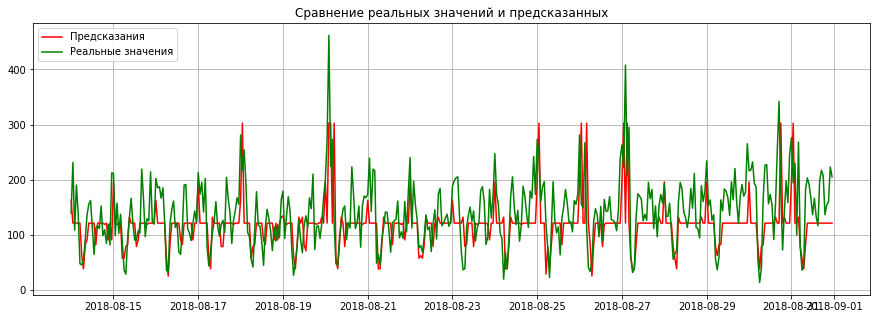

In [34]:
%%time

rmse = ml_result(DecisionTreeRegressor(random_state=12345, max_depth=5, min_samples_split=27))
results.loc[1, 'rmse_test'] = rmse
results

### Случайный лес

CPU times: user 6.38 s, sys: 26.2 ms, total: 6.41 s
Wall time: 6.42 s


,model,best_parameters_train,RMSE_train,rmse_test
0,LinearRegression,"{'fit_intercept': False, 'normalize': True}",-27.050550,45.174417
1,DecisionTreeRegressor,"{'max_depth': 5, 'min_samples_split': 26}",-29.684909,55.900218
2,RandomForestRegressor,"{'max_depth': 17, 'n_estimators': 146}",-25.059912,43.159392
3,CatBoostRegressor,"{'depth': 4, 'iterations': 20}",-25.644672,NaN
4,LGBMRegressor,{'n_estimators': 41},-25.029898,NaN


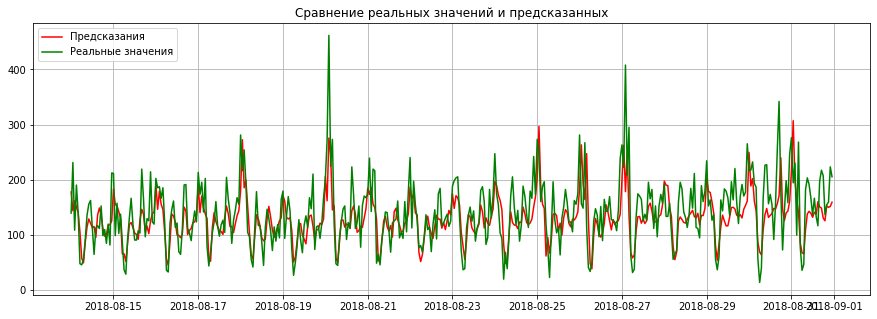

In [35]:
%%time

rmse = ml_result(RandomForestRegressor(random_state=12345, max_depth=18, n_estimators=146))
results.loc[2, 'rmse_test'] = rmseд
results

### CatBoostRegressor

0:	learn: 31.7208469	total: 2.49ms	remaining: 49.8ms
1:	learn: 28.5496280	total: 5.06ms	remaining: 48.1ms
2:	learn: 27.1000636	total: 7.55ms	remaining: 45.3ms
3:	learn: 25.9833905	total: 10.3ms	remaining: 43.7ms
4:	learn: 25.4483361	total: 12.9ms	remaining: 41.2ms
5:	learn: 25.3371618	total: 15.1ms	remaining: 37.7ms
6:	learn: 25.1180466	total: 17.6ms	remaining: 35.1ms
7:	learn: 24.5801190	total: 20.3ms	remaining: 33ms
8:	learn: 24.0331613	total: 22.8ms	remaining: 30.4ms
9:	learn: 23.7916503	total: 25.7ms	remaining: 28.2ms
10:	learn: 23.5666675	total: 28.5ms	remaining: 25.9ms
11:	learn: 23.4170476	total: 31ms	remaining: 23.3ms
12:	learn: 23.1702295	total: 33.6ms	remaining: 20.7ms
13:	learn: 23.0369197	total: 36.1ms	remaining: 18ms
14:	learn: 22.8049963	total: 38.8ms	remaining: 15.5ms
15:	learn: 22.7197233	total: 41.3ms	remaining: 12.9ms
16:	learn: 22.4778007	total: 43.8ms	remaining: 10.3ms
17:	learn: 22.3536184	total: 46.4ms	remaining: 7.74ms
18:	learn: 22.2180737	total: 48.9ms	remainin

,model,best_parameters_train,RMSE_train,rmse_test
0,LinearRegression,"{'fit_intercept': False, 'normalize': True}",-27.050550,45.174417
1,DecisionTreeRegressor,"{'max_depth': 5, 'min_samples_split': 26}",-29.684909,55.900218
2,RandomForestRegressor,"{'max_depth': 17, 'n_estimators': 146}",-25.059912,43.159392
3,CatBoostRegressor,"{'depth': 4, 'iterations': 20}",-25.644672,44.125440
4,LGBMRegressor,{'n_estimators': 41},-25.029898,NaN


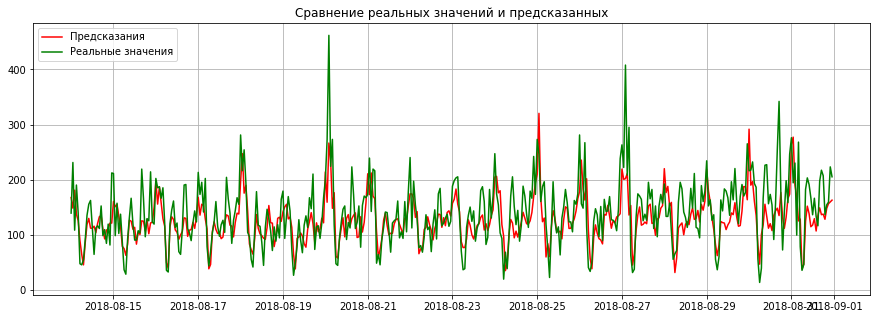

In [36]:
%%time

rmse = ml_result(CatBoostRegressor(loss_function="RMSE", learning_rate = 0.5, depth=4, iterations=21))
results.loc[3, 'rmse_test'] = rmse
results

### LGBMRegressor

CPU times: user 613 ms, sys: 16.1 ms, total: 629 ms
Wall time: 649 ms


,model,best_parameters_train,RMSE_train,rmse_test
0,LinearRegression,"{'fit_intercept': False, 'normalize': True}",-27.050550,45.174417
1,DecisionTreeRegressor,"{'max_depth': 5, 'min_samples_split': 26}",-29.684909,55.900218
2,RandomForestRegressor,"{'max_depth': 17, 'n_estimators': 146}",-25.059912,43.159392
3,CatBoostRegressor,"{'depth': 4, 'iterations': 20}",-25.644672,44.125440
4,LGBMRegressor,{'n_estimators': 41},-25.029898,41.909128


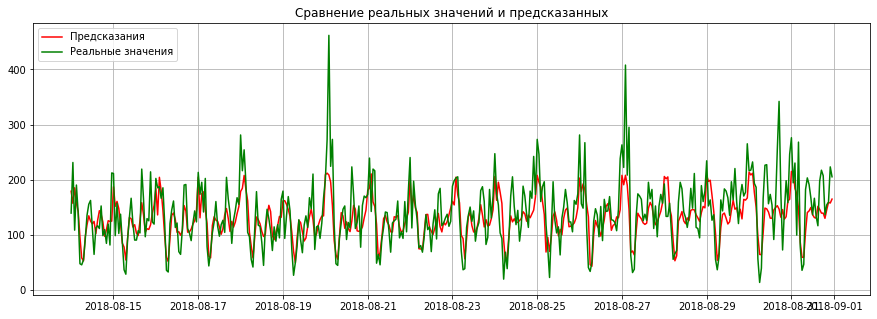

In [37]:
%%time

rmse = ml_result(LGBMRegressor(random_state=12345, n_estimators=41))
results.loc[4, 'rmse_test'] = rmse
results

Проверили модели с лучшими гиперпараметрами на тестовой выборке

В процессе проверки наших моделей на тестовой выборке все модели, кроме модели дерева решений уложились в значение метрики RMSE не более 48. 

Наилучшие значения оказались у модели LGBMRegressor. 

Данную модель можно рекомендовать к исполнению.

### Общий вывод

- На первом этапе произвели загрузку данных и подготовили для обучения моделей.
- За время наблюдений наметился определенный тренд на общее увеличение заказов такси в течение часа. На графиках явно видна суточная сезонность. Ночью количество заказов стремится к нулю, в то время как вечерний час пик - самый высокий спрос на услуги такси.
- На третьем этапе к данным были добавлены дополнительные признаки, а именно день недели, час "отстающие значения" и скользящее среднее. Далее подобрали оптимальные гиперпараметры для моделей.
- На четвертом этапе проведели тестирование всех моделей, каждой из них удалось достичь требуемого показателя метрики RMSE. Анализ сравнительных графиков, показал, что модели хуже всего справляются с предсказаниями на высоких пиках и на провалах, но в целом, угадывают направления движения. Наилучший показатель RMSE в данном случае у LGBMRegressor.